In [1]:
import os
import keras

Using TensorFlow backend.
/Users/cansumoran/opt/anaconda3/envs/AI_keras_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/cansumoran/opt/anaconda3/envs/AI_keras_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/cansumoran/opt/anaconda3/envs/AI_keras_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [2]:
import os, os.path, math

In [3]:
import random
from os import path
import shutil

0 age is missing: 94
0 age is missing: 97
0 age is missing: 98
0 age is missing: 102
1 age is missing: 103
0 age is missing: 104
0 age is missing: 106
0 age is missing: 107
0 age is missing: 108
0 age is missing: 109
1 age is missing: 111
0 age is missing: 112
0 age is missing: 113
0 age is missing: 114


In [4]:
for root, dirs, files in os.walk('./UTKFace/'):
    for file in files:
        label = file.split('_')[0]
        label_folder = './UTKFace/'
        if(int(label) < 15):
            label_folder = label_folder + 'child'
        elif(int(label) < 65):
            label_folder = label_folder + 'adult'
        else:
            label_folder = label_folder + 'elder'
            
        '''if int(label) in missing_ages:
            #remove the picture
            os.remove( './UTKFace/' + file)
            print("here")
            continue '''
        
        if not path.exists(label_folder):
            os.mkdir(label_folder)
        
        shutil.move(os.path.join(root, file), label_folder)


In [5]:
len(os.listdir('./UTKFace/'))

3

In [6]:
training_folder = './training_data'
if not path.exists(training_folder):
    os.mkdir(training_folder)
    
validation_folder = './validation_data'
if not path.exists(validation_folder):
    os.mkdir(validation_folder)
    
for root, dirs, files in os.walk('./UTKFace/'):
    for directory in dirs:
        training_labels = './training_data/' + directory
        validation_labels = './validation_data/' + directory
        
        if not path.exists(training_labels):
            os.mkdir(training_labels)
        
        if not path.exists(validation_labels):
            os.mkdir(validation_labels)
        

In [7]:
all_pictures = 0
picture_names = []
for root, dirs, files in os.walk('./UTKFace/'):
    for file in files:
        all_pictures = all_pictures + 1
        picture_names.append(os.path.join(root, file))

In [8]:
#floor function is used to get an integer number of pictures
training_number = math.floor(all_pictures * 70 / 100) # 70% of the pictures will be used as training data 
validation_number = all_pictures - training_number # 30% of the pictures will be used as validation data 

print(training_number)
print(validation_number)

16595
7113


In [12]:
#randomize the picture names list so that when they are seperated into training, validation and test files 
#they will be distributed randomly
random.shuffle(picture_names)

for i in range (all_pictures):
    if(i < training_number):
        #move the picture to training data folder
        print(picture_names[i].split('/')[2])
        shutil.move(picture_names[i], './training_data/' + picture_names[i].split('/')[2])
    else:
        #move the picture to validation data folder
        shutil.move(picture_names[i], './validation_data/' + picture_names[i].split('/')[2])



adult


Error: Destination path './training_data/adult/38_1_3_20170117121011234.jpg.chip.jpg' already exists

In [11]:
#check if the number of pictures in the folders to make sure the seperation is correct
#print(len(os.listdir('./test_data/')))
print(len(os.listdir('./validation_data')))
print(len(os.listdir('./training_data')))

3
3


In [13]:
#seperate the pictures into classes 
'''
for root, dirs, files in os.walk('./training_data/'):
    for file in files:
        label = file.split('_')[0]
        label_folder = './training_data/' + label
        print(label_folder)
        
        if not path.exists(label_folder):
            os.mkdir(label_folder)
            
        shutil.move(os.path.join(root, file), label_folder)

        
for root, dirs, files in os.walk('./validation_data/'):
    for file in files:
        label = file.split('_')[0]
        label_folder = './validation_data/' + label
        
        if not path.exists(label_folder):
            os.mkdir(label_folder)
        
        shutil.move(os.path.join(root, file), label_folder)
'''

"\nfor root, dirs, files in os.walk('./training_data/'):\n    for file in files:\n        label = file.split('_')[0]\n        label_folder = './training_data/' + label\n        print(label_folder)\n        \n        if not path.exists(label_folder):\n            os.mkdir(label_folder)\n            \n        shutil.move(os.path.join(root, file), label_folder)\n\n        \nfor root, dirs, files in os.walk('./validation_data/'):\n    for file in files:\n        label = file.split('_')[0]\n        label_folder = './validation_data/' + label\n        \n        if not path.exists(label_folder):\n            os.mkdir(label_folder)\n        \n        shutil.move(os.path.join(root, file), label_folder)\n"

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        './training_data',
        target_size=(200, 200),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        './validation_data',
        target_size=(200, 200),
        batch_size=20,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


Found 16595 images belonging to 3 classes.
Found 7113 images belonging to 3 classes.
data batch shape: (20, 200, 200, 3)
labels batch shape: (20, 3)


In [4]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 270848)            0         
_________________________________________________________________
dens

In [5]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 181s 2s/step - loss: 0.6762 - acc: 0.7780 - val_loss: 0.5941 - val_acc: 0.8050
Epoch 2/30
100/100 [==============================] - 183s 2s/step - loss: 0.4360 - acc: 0.8565 - val_loss: 0.3969 - val_acc: 0.8570
Epoch 3/30
100/100 [==============================] - 182s 2s/step - loss: 0.3832 - acc: 0.8690 - val_loss: 0.3623 - val_acc: 0.8610
Epoch 4/30
100/100 [==============================] - 189s 2s/step - loss: 0.3509 - acc: 0.8725 - val_loss: 0.3677 - val_acc: 0.8700
Epoch 5/30
100/100 [==============================] - 190s 2s/step - loss: 0.3223 - acc: 0.8815 - val_loss: 0.3795 - val_acc: 0.8630
Epoch 6/30
100/100 [==============================] - 190s 2s/step - loss: 0.3135 - acc: 0.8845 - val_loss: 0.2881 - val_acc: 0.8960
Epoch 7/30
100/100 [==============================] - 214s 2s/step - loss: 0.3157 - acc: 0.8865 - val_loss: 0.2645 - val_acc: 0.9060
Epoch 8/30
100/100 [=

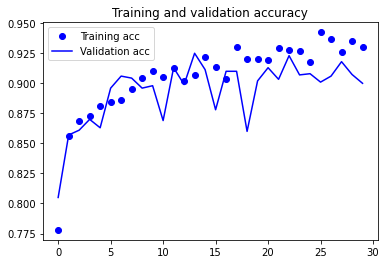

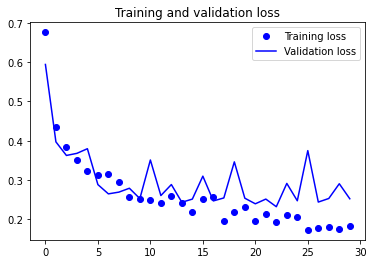

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()